In [1]:
import numpy as np
# import cupy as np
import random
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from dataclasses import dataclass
from enum import Enum
import time
import torch


In [2]:
print(torch.__version__)
print("Cuda:", torch.cuda.is_available())
print("MPS:", torch.mps.is_available())
print("CPU:", torch.cpu.is_available())


2.8.0+cu128
Cuda: True
MPS: False
CPU: True


In [3]:
from Game import Game2048Env, Direction

In [4]:
game = Game2048Env(random_seed=1234)
state = game.reset()
done = False

def print_board(board):
    for x in board:
        print("\t".join(f"{v:4}" for v in x))
    print("-" * 20)

print_board(state)

done = False

while not done:  # Play some random moves

    # action = Direction(np.random.randint(4))  # Random action for demonstration
    actions = [Direction.LEFT, Direction.UP, Direction.RIGHT, Direction.DOWN]
    state, reward, done, meta = game.step(actions)

    # print(f"Action: {meta['direction']} | Score: {game.score}")
    # print(f"Reward: {reward} | Done: {done}")
    
print_board(state)
    
    

   0	   2	   0	   0
   2	   0	   0	   0
   0	   0	   0	   0
   0	   0	   0	   0
--------------------
 256	  64	  32	  16
 128	  32	  16	   8
  32	  16	   8	   4
   2	   8	   4	   2
--------------------


In [5]:
from SimpleNeuralNetwork import SimpleNeuralNetwork

In [6]:
from EvolutionaryOptimizer import EvolutionaryOptimizer

In [7]:
import pickle

def save_network(network: SimpleNeuralNetwork, filename: str):
    torch.save(network.state_dict(), filename)

def load_network(filename: str, hidden_layers: List[int]) -> SimpleNeuralNetwork:
    network = SimpleNeuralNetwork(hidden_layers=hidden_layers)
    network.load_state_dict(torch.load(filename, map_location=DEVICE))
    network.to(DEVICE)
    return network

def save_population(population: List[SimpleNeuralNetwork], filename: str):
    with open(filename, 'wb') as f:
        pickle.dump(population, f)   

def load_population(filename: str) -> List[SimpleNeuralNetwork]:
    with open(filename, 'rb') as f:
        population = pickle.load(f)
    return population

Saving networks to folder: networks/64
⏳ 5:48:58.911357 | Generation 446/1000 - Average Best Tile: 480.0 - Best Score: 7592 
⏳ 5:48:37.491908 | Generation 447/1000 - Average Best Tile: 512.0 - Best Score: 7592 
⏳ 5:48:03.073806 | Generation 448/1000 - Average Best Tile: 289.28 - Best Score: 6624 
⏳ 5:47:21.192557 | Generation 449/1000 - Average Best Tile: 330.24 - Best Score: 4780 
⏳ 5:46:26.544351 | Generation 450/1000 - Average Best Tile: 136.96 - Best Score: 3864 
⏳ 5:45:39.858070 | Generation 451/1000 - Average Best Tile: 281.6 - Best Score: 5932 
Saving population at generation 451
⏳ 5:45:04.084145 | Generation 452/1000 - Average Best Tile: 366.08 - Best Score: 5932 
⏳ 5:44:30.105143 | Generation 453/1000 - Average Best Tile: 488.96 - Best Score: 6080 
⏳ 5:43:45.679660 | Generation 454/1000 - Average Best Tile: 412.16 - Best Score: 5560 
⏳ 5:43:01.189958 | Generation 455/1000 - Average Best Tile: 275.2 - Best Score: 5560 
⏳ 5:42:32.814188 | Generation 456/1000 - Average Best Tile:

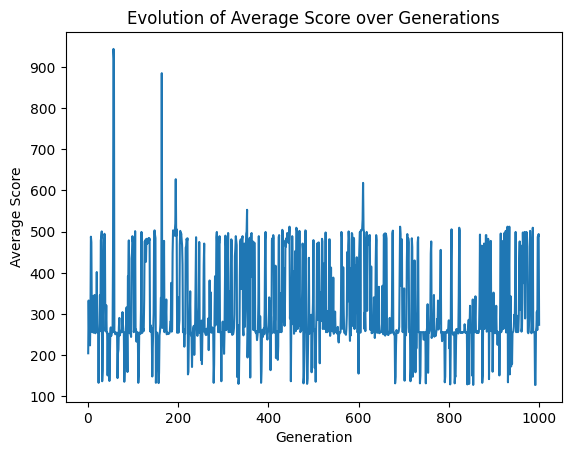

In [ ]:
from datetime import timedelta

def main():
    generations = 1000
    games_per_player = 3
    max_steps = 10000
    hidden_layers = [64]

    optimizer = EvolutionaryOptimizer(
        population_size=100,
        elite_size=20,
        new_members=20,
        mutation_rate=0.05,
        mutation_strength=0.1,
        hidden_layers=hidden_layers
    )

    loop_start_time = time.time()

    # Create directory for saving networks
    import os
    folder = f"networks/{'_'.join(str(x) for x in hidden_layers)}"
    os.makedirs(folder, exist_ok=True)
    print(f"Saving networks to folder: {folder}")

    best_score = 0
    avg_best_tiles = []
    for gen in range(generations):
        (population, avg_best_tile, best_score) = optimizer.run_generation(games_per_player, max_steps, base_random_seed=gen)
        avg_best_tiles.append(avg_best_tile)
        elapsed_time = time.time() - loop_start_time
        average_time_per_iteration = elapsed_time / (gen + 1)
        duration = str(timedelta(seconds=(average_time_per_iteration * (generations - gen + 1))))

        # Save best network every 10 generations
        print(f"⏳ {duration} | Generation {gen+1}/{generations} - Average Best Tile: {avg_best_tile} - Best Score: {best_score} ")
        if (gen % 10 == 0) or (gen == generations - 1):
            print(f"Saving population at generation {gen+1}")
            save_population(population, f'{folder}/population_gen_{gen+1}.pkl')


    # evaluated = optimizer.evaluate(env, 10)
    # best_network, best_score = max(evaluated, key=lambda x: x[1])

    # Plot average scores over generations
    plt.plot(range(1, generations + 1), avg_best_tiles)
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.title('Evolution of Average Score over Generations')
    plt.show()

if __name__ == "__main__":
    main()